In [25]:
# param
import platform

if platform.system() == 'Linux':
    BASE_FOLDER = '/home/jim/Documents'
else:
    BASE_FOLDER = '/Users/jim/Documents'
    
DATA_FOLDER = BASE_FOLDER + '/data0711'
CLEAN_DATA_FOLDER = BASE_FOLDER + '/clean_data'
steerings_range = list(range(-50, 55, 5))
speed_range = list(range(-100, 105, 5))
ratio = 0.8

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dist(df, column, value_range, title='', subplot=None):
    value_count = [len(df.loc[df[column] == v]) for v in value_range]
    
    if subplot:
        plt.subplot(*subplot)

    plt.bar(value_range, value_count, width=4)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title(title)

    if not subplot:
        plt.show()

In [27]:
import pandas as pd
import json

# trans json data to dataframe
with open(DATA_FOLDER + '/motor_im_map.json', 'r') as f:
  json_data = json.loads(f.read())

raw_data = {
    'im_key': [],
    'speed': [],
    'steering': [],
}

for im_key, (speed, steering) in json_data.items():
  raw_data['im_key'].append(im_key)
  raw_data['speed'].append(speed)
  raw_data['steering'].append(steering)

df = pd.DataFrame(raw_data)
print(df)

                                     im_key  speed  steering
0      e6beef30-e22e-11eb-bf05-984827de9286      0         0
1      e6f50c00-e22e-11eb-bf05-984827de9286      0         0
2      e6f6f254-e22e-11eb-bf05-984827de9286      0         0
3      e6f857d4-e22e-11eb-bf05-984827de9286      0         0
4      e6f9a800-e22e-11eb-bf05-984827de9286      0         0
...                                     ...    ...       ...
13595  62a37f1a-e231-11eb-bf5b-984827de9286      0         0
13596  62ad1098-e231-11eb-bf5b-984827de9286      0         0
13597  62bd7ce4-e231-11eb-bf5b-984827de9286      0         0
13598  62ceca26-e231-11eb-bf5b-984827de9286      0         0
13599  62d720ea-e231-11eb-bf5b-984827de9286      0         0

[13600 rows x 3 columns]


In [30]:
def seperate_data(df, max_dataset=None):
    train_df = pd.DataFrame(columns=df.columns)
    valid_df = pd.DataFrame(columns=df.columns)

    for steering in steerings_range:
        _df = df.loc[df['steering'] == steering]

        if max_dataset and len(_df) > max_dataset:
            _df = _df.sample(n=max_dataset)

        train_temp = _df.sample(frac=ratio)
        valid_temp = _df.drop(train_temp.index)

        train_df = train_df.append(train_temp)
        valid_df = valid_df.append(valid_temp)

    return train_df, valid_df


# remove speed == 0
df_no_zero = df.loc[df['speed'] != 0]
# seperate
MAX_DATASET = 800
train_df, valid_df = seperate_data(df_no_zero, max_dataset=MAX_DATASET)

train data set:  4959
valid data set:  1239


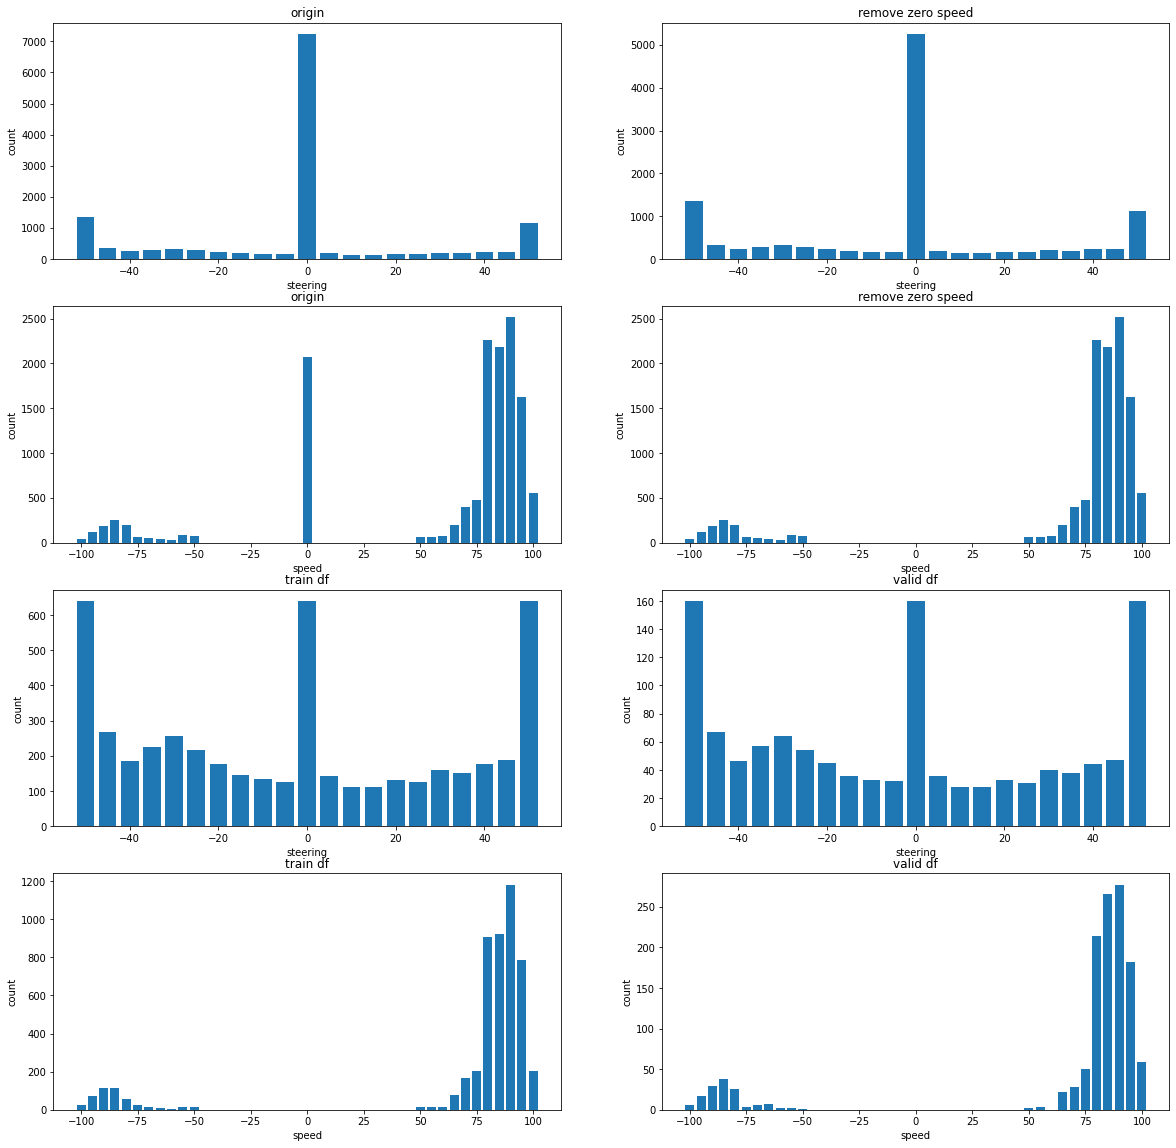

In [31]:
# origin df
plt.rcParams['figure.figsize'] = [20, 20]
plot_dist(df, 'steering', steerings_range, 'origin', (4, 2, 1))
plot_dist(df_no_zero, 'steering', steerings_range, 'remove zero speed', (4, 2, 2))
plot_dist(df, 'speed', speed_range, 'origin', (4, 2, 3))
plot_dist(df_no_zero, 'speed', speed_range, 'remove zero speed', (4, 2, 4))
plot_dist(train_df, 'steering', steerings_range, 'train df', (4, 2, 5))
plot_dist(valid_df, 'steering', steerings_range, 'valid df', (4, 2, 6))
plot_dist(train_df, 'speed', speed_range, 'train df', (4, 2, 7))
plot_dist(valid_df, 'speed', speed_range, 'valid df', (4, 2, 8))
print('train data set: ', len(train_df))
print('valid data set: ', len(valid_df))

In [33]:
# shuffle
train_df = train_df.sample(frac=1)
valid_df = valid_df.sample(frac=1)

import os

if not os.path.exists(CLEAN_DATA_FOLDER):
    os.mkdir(CLEAN_DATA_FOLDER)
    os.mkdir(CLEAN_DATA_FOLDER + '/img')

train_df.to_csv(CLEAN_DATA_FOLDER + '/train.csv', index=False)
valid_df.to_csv(CLEAN_DATA_FOLDER + '/valid.csv', index=False)

In [34]:
from shutil import copyfile

# cp img data
for k in train_df.append(valid_df)['im_key']:
    img_path = f'/img/{k}.jpg'
    copyfile(DATA_FOLDER + img_path, CLEAN_DATA_FOLDER + img_path)

In [30]:
tar cvf clean_data.tar clean_data

tar: clean_data: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors
